In [3]:
import subprocess
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
def benchmark(primes_size: int, n_mpi: int, n_multiprocessing: int, repeat: int) -> float:
    times = []
    for _ in range(repeat):
        result = subprocess.run(['mpiexec', '-n', str(n_mpi), 'python', 'SieveOfEratosthenes.py', str(primes_size), str(n_multiprocessing)], stdout=subprocess.PIPE)
        times.append(float(re.findall("\d+\.\d+", str(result.stdout))[0]))
    return sum(times) / repeat

Settings voor de benchmark

In [35]:
primes_size = 10**8   # aantal priem getallen om op te testen
cpus = os.cpu_count() # aantal cpu's om op te testen
benchmark_repeats = 5 # aantal keer dat de test wordt herhaalt om het gemiddelde te nemen

In [36]:
mpi_times = [benchmark(primes_size, i, 1, benchmark_repeats) for i in range(1, cpus+1)]

In [39]:
multiprocess_times = [benchmark(primes_size, 1, i, benchmark_repeats) for i in range(1, cpus+1)]

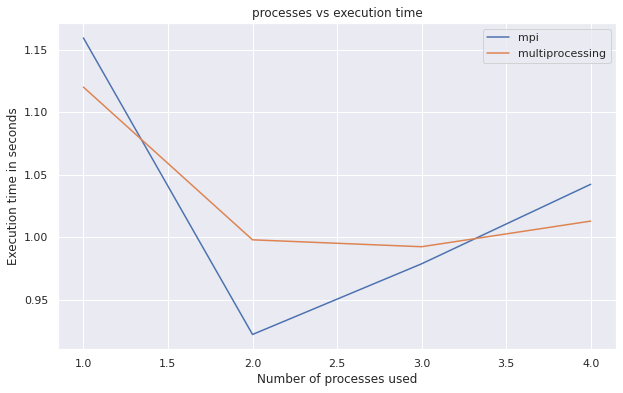

In [44]:
sns.set(rc={'figure.figsize':(10, 6)})
ax1 = sns.lineplot(x=range(1, cpus+1), y=mpi_times, label='mpi')
ax2 = sns.lineplot(x=range(1, cpus+1), y=multiprocess_times, label='multiprocessing')
ax1.set(xlabel="Number of processes used", ylabel="Execution time in seconds", title='processes vs execution time')
plt.show()

Ik heb heel veel tijd besteed om een verschil te krijgen maar ik durf er nog steeds niet echt een verband uit te trekken.

Het lijkt wel sneller te zijn dan met maar 1 thread.

In [59]:
size_times = [benchmark(10**i, int(cpus/2), int(cpus/2), benchmark_repeats) for i in range(1, 9)]

/home/horstl/anaconda3/envs/hpp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


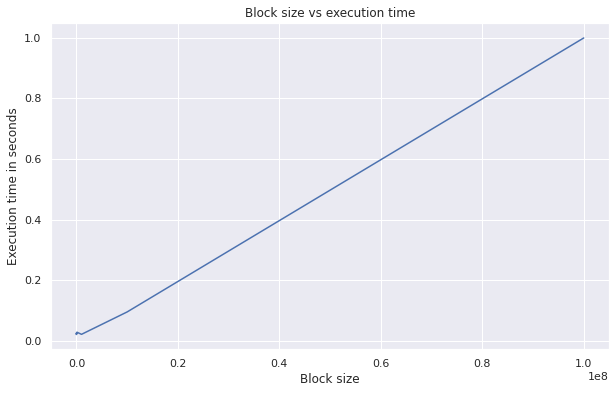

In [58]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.lineplot([10**i for i in range(1, 9)], y=size_times)
ax.set(xlabel="Block size", ylabel="Execution time in seconds", title='Block size vs execution time')
plt.show()

Nou zien we ook weer dat de complexiteit O(n) is.

(Of nouja het zou op een andere schaal anders kunnen zijn,
maar dit verwacht ik ook wel)

### Reflectie
MPI en multiprocessing heeft natuurlijk niet zo veel zin op deze manier, het zou zeker interresant zijn om het over meer computers te verdelen